In [108]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#import matplotlib.pyplot as plt
from pendulum_with_PID import Record

c:\users\slav\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


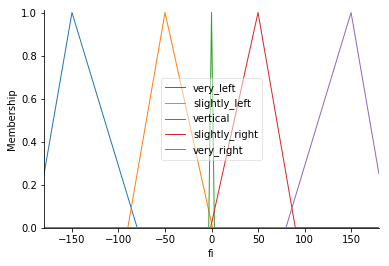

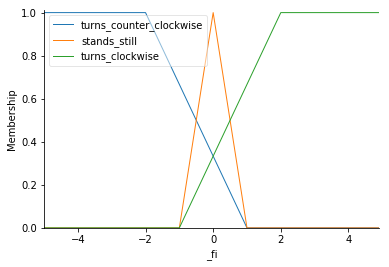

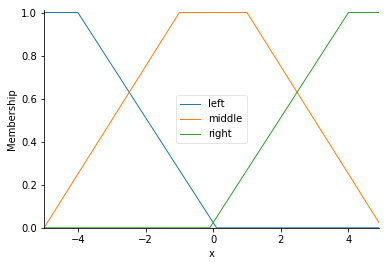

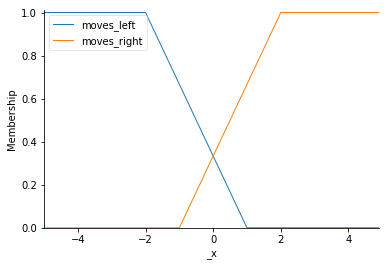

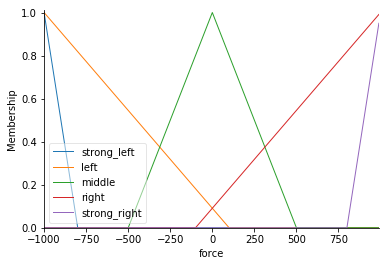

In [326]:
fi = ctrl.Antecedent(np.arange(-180, 180, 0.1), 'fi')
_fi = ctrl.Antecedent(np.arange(-5, 5, 0.1), '_fi')
x = ctrl.Antecedent(np.arange(-5, 5, 0.1), 'x')
_x = ctrl.Antecedent(np.arange(-5, 5, 0.1), '_x')
force = ctrl.Consequent(np.arange(-1000, 1000, 10), 'force')

fi['very_left'] = fuzz.trimf(fi.universe, [-190, -150, -80])
fi['slightly_left'] = fuzz.trimf(fi.universe, [-90, -50, 1])
fi['vertical'] = fuzz.trimf(fi.universe, [-3, 0, 3])
fi['slightly_right'] = fuzz.trimf(fi.universe, [-1, 50, 90])
fi['very_right'] = fuzz.trimf(fi.universe, [80, 150, 190])
#fi['vertical_down'] = fuzz.trimf(fi.universe, [-10, 0, 10])

_fi['turns_counter_clockwise'] = fuzz.trapmf(_fi.universe, [-6, -6, -2, 1])
_fi['stands_still'] = fuzz.trimf(_fi.universe, [-1,  0, 1])
_fi['turns_clockwise'] = fuzz.trapmf(_fi.universe, [-1, 2, 6, 6])

x['left'] = fuzz.trapmf(x.universe, [-5, -5, -4, 0.1])
x['middle'] = fuzz.trapmf(x.universe, [-5, -1, 1, 5])
x['right'] = fuzz.trapmf(x.universe, [-0.1, 4, 5, 5])

_x['moves_left'] = fuzz.trapmf(_x.universe, [-5, -5, -2, 1])
_x['moves_right'] = fuzz.trapmf(_x.universe, [-1, 2, 5, 5])

force['strong_left'] = fuzz.trimf(force.universe, [-1000, -1000, -800])
force['left'] = fuzz.trimf(force.universe, [-1000, -1000, 100])
force['middle'] = fuzz.trimf(force.universe, [-500, 0, 500])
force['right'] = fuzz.trimf(force.universe, [-100, 1000, 1000])
force['strong_right'] = fuzz.trimf(force.universe, [800, 1000, 1000])

fi.view()
_fi.view()
x.view()
_x.view()
force.view()

In [327]:
rule1 = ctrl.Rule(x['right'] | fi['slightly_right'], force['right'])
rule2 = ctrl.Rule(x['left'] | fi['slightly_left'], force['left'])
rule3 = ctrl.Rule(fi['slightly_right'], force['right'])
rule4 = ctrl.Rule(fi['slightly_left'], force['left'])
#rule3 = ctrl.Rule(x['middle'] & fi['slightly_left'], force['right'])
#rule4 = ctrl.Rule(x['middle'] & fi['slightly_right'], force['left'])
rule5 = ctrl.Rule(x['middle'] | _fi['turns_clockwise'], force['strong_right'], )
rule6 = ctrl.Rule(x['middle'] | _fi['turns_counter_clockwise'], force['strong_left'])
#rule7 = ctrl.Rule(fi['vertical'], force['middle'])

rule8 = ctrl.Rule(x['left'] & ~x['middle'] & fi['vertical'] & _fi['stands_still'], force['right'])
rule9 = ctrl.Rule(x['right'] & ~x['middle'] & fi['vertical'] & _fi['stands_still'], force['left'])
rule10 = ctrl.Rule(_x['moves_left'] & x['middle'] & fi['vertical'] & _fi['stands_still'], force['right'])
rule11 = ctrl.Rule(_x['moves_right'] & x['middle'] & fi['vertical'] & _fi['stands_still'], force['left'])

rule12 = ctrl.Rule(x['right'], force['right'])
rule13 = ctrl.Rule(x['left'], force['left'])

In [328]:
#force_controler = ctrl.ControlSystem([rule1, rule2, rule5, rule6, rule7])#, rule8, rule9])#, rule3, rule4, rule5, rule6])
force_controler = ctrl.ControlSystem([rule3, rule4, rule5, rule6, rule8, rule9, rule10, rule11])
estimated_force = ctrl.ControlSystemSimulation(force_controler)

29.999999999999996 0
angle: 29.79  position: -0.00  speed: -0.36  force: 329.00
angle: 29.34  position: -0.01  speed: -0.79  force: 327.94
angle: 28.63  position: -0.03  speed: -1.25  force: 325.62
angle: 27.65  position: -0.05  speed: -1.70  force: 321.89
angle: 26.41  position: -0.08  speed: -2.16  force: 316.55
angle: 24.90  position: -0.11  speed: -2.63  force: 309.48
angle: 23.13  position: -0.15  speed: -3.09  force: 300.39
angle: 21.10  position: -0.20  speed: -3.56  force: 289.03
angle: 18.79  position: -0.25  speed: -4.01  force: 274.93
angle: 16.24  position: -0.30  speed: -4.46  force: 257.59
angle: 13.43  position: -0.36  speed: -4.89  force: 236.30
angle: 10.40  position: -0.42  speed: -5.29  force: 210.02
angle: 7.17  position: -0.49  speed: -5.65  force: 177.07
angle: 3.76  position: -0.56  speed: -5.94  force: 134.51
angle: 0.25  position: -0.63  speed: -6.13  force: 76.76
angle: -3.27  position: -0.71  speed: -6.14  force: -29.48
angle: -6.68  position: -0.78  speed: -

angle: -10.62  position: -2.43  speed: -6.76  force: -219.16
angle: -14.22  position: -2.54  speed: -6.28  force: -263.25
angle: -17.50  position: -2.64  speed: -5.73  force: -297.74
angle: -20.46  position: -2.73  speed: -5.15  force: -325.89
angle: -23.06  position: -2.81  speed: -4.55  force: -349.09
angle: -25.32  position: -2.89  speed: -3.94  force: -368.31
angle: -27.22  position: -2.96  speed: -3.32  force: -384.20
angle: -28.77  position: -3.03  speed: -2.71  force: -397.22
angle: -29.98  position: -3.08  speed: -2.10  force: -407.82
angle: -30.84  position: -3.13  speed: -1.50  force: -416.16
angle: -31.36  position: -3.17  speed: -0.91  force: -419.72
angle: -31.55  position: -3.21  speed: -0.33  force: -413.61
angle: -31.40  position: -3.23  speed: 0.25  force: -416.65
angle: -30.93  position: -3.25  speed: 0.83  force: -417.53
angle: -30.15  position: -3.26  speed: 1.36  force: -380.00
angle: -29.08  position: -3.27  speed: 1.87  force: -353.35
angle: -27.73  position: -3.

angle: -2.76  position: -6.53  speed: -0.00  force: -3.31
angle: -2.76  position: -6.56  speed: -0.00  force: -3.31
angle: -2.76  position: -6.58  speed: 0.00  force: -3.31
angle: -2.76  position: -6.61  speed: 0.00  force: -3.31
angle: -2.76  position: -6.64  speed: 0.00  force: -3.31
angle: -2.76  position: -6.67  speed: -0.00  force: -3.31
angle: -2.76  position: -6.70  speed: -0.00  force: -3.31
angle: -2.76  position: -6.73  speed: -0.00  force: -3.31
angle: -2.76  position: -6.76  speed: 0.00  force: -3.31
angle: -2.76  position: -6.78  speed: 0.00  force: -3.31
angle: -2.76  position: -6.81  speed: 0.00  force: -3.31
angle: -2.76  position: -6.84  speed: 0.00  force: -3.31
angle: -2.76  position: -6.87  speed: -0.00  force: -3.31
angle: -2.76  position: -6.90  speed: -0.00  force: -3.31
angle: -2.76  position: -6.93  speed: -0.00  force: -3.31
angle: -2.76  position: -6.95  speed: 0.00  force: -3.31
angle: -2.76  position: -6.98  speed: 0.00  force: -3.31
angle: -2.76  position:

angle: -2.76  position: -10.22  speed: 0.00  force: -3.31
angle: -2.76  position: -10.24  speed: 0.00  force: -3.31
angle: -2.76  position: -10.27  speed: 0.00  force: -3.31
angle: -2.76  position: -10.29  speed: 0.00  force: -3.31
angle: -2.76  position: -10.31  speed: 0.00  force: -3.31
angle: -2.76  position: -10.33  speed: 0.00  force: -3.31
angle: -2.76  position: -10.35  speed: 0.00  force: -3.31
angle: -2.76  position: -10.37  speed: 0.00  force: -3.31
angle: -2.76  position: -10.40  speed: 0.00  force: -3.31
angle: -2.76  position: -10.42  speed: 0.00  force: -3.31
angle: -2.76  position: -10.44  speed: 0.00  force: -3.31
angle: -2.76  position: -10.46  speed: 0.00  force: -3.31
angle: -2.76  position: -10.48  speed: 0.00  force: -3.31
angle: -2.76  position: -10.50  speed: 0.00  force: -3.31
angle: -2.76  position: -10.53  speed: 0.00  force: -3.31
angle: -2.76  position: -10.55  speed: 0.00  force: -3.31
angle: -2.76  position: -10.57  speed: 0.00  force: -3.31
angle: -2.76  

angle: -2.76  position: -12.88  speed: 0.00  force: -3.31
angle: -2.76  position: -12.89  speed: 0.00  force: -3.31
angle: -2.76  position: -12.91  speed: -0.00  force: -3.31
angle: -2.76  position: -12.92  speed: 0.00  force: -3.31
angle: -2.76  position: -12.94  speed: 0.00  force: -3.31
angle: -2.76  position: -12.95  speed: 0.00  force: -3.31
angle: -2.76  position: -12.97  speed: 0.00  force: -3.31
angle: -2.76  position: -12.98  speed: 0.00  force: -3.31
angle: -2.76  position: -13.00  speed: 0.00  force: -3.31
angle: -2.76  position: -13.01  speed: 0.00  force: -3.31
angle: -2.76  position: -13.03  speed: 0.00  force: -3.31
angle: -2.76  position: -13.04  speed: 0.00  force: -3.31
angle: -2.76  position: -13.06  speed: 0.00  force: -3.31
angle: -2.76  position: -13.07  speed: 0.00  force: -3.31
angle: -2.76  position: -13.09  speed: 0.00  force: -3.31
angle: -2.76  position: -13.10  speed: 0.00  force: -3.31
angle: -2.76  position: -13.12  speed: 0.00  force: -3.31
angle: -2.76 

angle: -2.76  position: -14.60  speed: 0.00  force: -3.31
angle: -2.76  position: -14.61  speed: 0.00  force: -3.31
angle: -2.76  position: -14.62  speed: 0.00  force: -3.31
angle: -2.76  position: -14.62  speed: 0.00  force: -3.31
angle: -2.76  position: -14.63  speed: -0.00  force: -3.31
angle: -2.76  position: -14.64  speed: 0.00  force: -3.31
angle: -2.76  position: -14.65  speed: 0.00  force: -3.31
angle: -2.76  position: -14.66  speed: 0.00  force: -3.31
angle: -2.76  position: -14.67  speed: 0.00  force: -3.31
angle: -2.76  position: -14.67  speed: 0.00  force: -3.31
angle: -2.76  position: -14.68  speed: 0.00  force: -3.31
angle: -2.76  position: -14.69  speed: 0.00  force: -3.31
angle: -2.76  position: -14.70  speed: -0.00  force: -3.31
angle: -2.76  position: -14.71  speed: 0.00  force: -3.31
angle: -2.76  position: -14.71  speed: 0.00  force: -3.31
angle: -2.76  position: -14.72  speed: 0.00  force: -3.31
angle: -2.76  position: -14.73  speed: 0.00  force: -3.31
angle: -2.76

angle: -2.76  position: -15.34  speed: 0.00  force: -3.31
angle: -2.76  position: -15.34  speed: 0.00  force: -3.31
angle: -2.76  position: -15.34  speed: 0.00  force: -3.31
angle: -2.76  position: -15.35  speed: 0.00  force: -3.31
angle: -2.76  position: -15.35  speed: 0.00  force: -3.31
angle: -2.76  position: -15.35  speed: 0.00  force: -3.31
angle: -2.76  position: -15.35  speed: -0.00  force: -3.31
angle: -2.76  position: -15.35  speed: 0.00  force: -3.31
angle: -2.76  position: -15.35  speed: 0.00  force: -3.31
angle: -2.76  position: -15.35  speed: 0.00  force: -3.31
angle: -2.76  position: -15.36  speed: 0.00  force: -3.31
angle: -2.76  position: -15.36  speed: 0.00  force: -3.31
angle: -2.76  position: -15.36  speed: 0.00  force: -3.31
angle: -2.76  position: -15.36  speed: 0.00  force: -3.31
angle: -2.76  position: -15.36  speed: -0.00  force: -3.31
angle: -2.76  position: -15.36  speed: 0.00  force: -3.31
angle: -2.76  position: -15.36  speed: 0.00  force: -3.31
angle: -2.76

angle: -2.76  position: -15.10  speed: 0.00  force: -3.31
angle: -2.76  position: -15.10  speed: 0.00  force: -3.31
angle: -2.76  position: -15.09  speed: 0.00  force: -3.31
angle: -2.76  position: -15.09  speed: 0.00  force: -3.31
angle: -2.76  position: -15.08  speed: 0.00  force: -3.31
angle: -2.76  position: -15.08  speed: 0.00  force: -3.31
angle: -2.76  position: -15.07  speed: 0.00  force: -3.31
angle: -2.76  position: -15.07  speed: 0.00  force: -3.31
angle: -2.76  position: -15.06  speed: 0.00  force: -3.31
angle: -2.76  position: -15.06  speed: 0.00  force: -3.31
angle: -2.76  position: -15.05  speed: 0.00  force: -3.31
angle: -2.76  position: -15.04  speed: 0.00  force: -3.31
angle: -2.76  position: -15.04  speed: 0.00  force: -3.31
angle: -2.76  position: -15.03  speed: 0.00  force: -3.31
angle: -2.76  position: -15.03  speed: 0.00  force: -3.31
angle: -2.76  position: -15.02  speed: 0.00  force: -3.31
angle: -2.76  position: -15.02  speed: 0.00  force: -3.31
angle: -2.76  

angle: -2.76  position: -13.91  speed: 0.00  force: -3.31
angle: -2.76  position: -13.90  speed: 0.00  force: -3.31
angle: -2.76  position: -13.89  speed: 0.00  force: -3.31
angle: -2.76  position: -13.87  speed: 0.00  force: -3.31
angle: -2.76  position: -13.86  speed: 0.00  force: -3.31
angle: -2.76  position: -13.85  speed: 0.00  force: -3.31
angle: -2.76  position: -13.84  speed: 0.00  force: -3.31
angle: -2.76  position: -13.83  speed: 0.00  force: -3.31
angle: -2.76  position: -13.81  speed: 0.00  force: -3.31
angle: -2.76  position: -13.80  speed: 0.00  force: -3.31
angle: -2.76  position: -13.79  speed: 0.00  force: -3.31
angle: -2.76  position: -13.78  speed: 0.00  force: -3.31
angle: -2.76  position: -13.77  speed: 0.00  force: -3.31
angle: -2.76  position: -13.75  speed: 0.00  force: -3.31
angle: -2.76  position: -13.74  speed: 0.00  force: -3.31
angle: -2.76  position: -13.73  speed: 0.00  force: -3.31
angle: -2.76  position: -13.72  speed: 0.00  force: -3.31
angle: -2.76  

angle: -2.76  position: -11.75  speed: 0.00  force: -3.31
angle: -2.76  position: -11.73  speed: 0.00  force: -3.31
angle: -2.76  position: -11.71  speed: 0.00  force: -3.31
angle: -2.76  position: -11.69  speed: 0.00  force: -3.31
angle: -2.76  position: -11.67  speed: 0.00  force: -3.31
angle: -2.76  position: -11.65  speed: 0.00  force: -3.31
angle: -2.76  position: -11.63  speed: -0.00  force: -3.31
angle: -2.76  position: -11.62  speed: 0.00  force: -3.31
angle: -2.76  position: -11.60  speed: 0.00  force: -3.31
angle: -2.76  position: -11.58  speed: 0.00  force: -3.31
angle: -2.76  position: -11.56  speed: 0.00  force: -3.31
angle: -2.76  position: -11.54  speed: 0.00  force: -3.31
angle: -2.76  position: -11.52  speed: 0.00  force: -3.31
angle: -2.76  position: -11.50  speed: 0.00  force: -3.31
angle: -2.76  position: -11.48  speed: -0.00  force: -3.31
angle: -2.76  position: -11.46  speed: 0.00  force: -3.31
angle: -2.76  position: -11.44  speed: 0.00  force: -3.31
angle: -2.76

angle: -2.76  position: -8.62  speed: 0.00  force: -3.31
angle: -2.76  position: -8.59  speed: -0.00  force: -3.31
angle: -2.76  position: -8.57  speed: 0.00  force: -3.31
angle: -2.76  position: -8.54  speed: 0.00  force: -3.31
angle: -2.76  position: -8.52  speed: 0.00  force: -3.31
angle: -2.76  position: -8.49  speed: 0.00  force: -3.31
angle: -2.76  position: -8.46  speed: 0.00  force: -3.31
angle: -2.76  position: -8.44  speed: 0.00  force: -3.31
angle: -2.76  position: -8.41  speed: 0.00  force: -3.31
angle: -2.76  position: -8.39  speed: -0.00  force: -3.31
angle: -2.76  position: -8.36  speed: 0.00  force: -3.31
angle: -2.76  position: -8.34  speed: 0.00  force: -3.31
angle: -2.76  position: -8.31  speed: 0.00  force: -3.31
angle: -2.76  position: -8.28  speed: 0.00  force: -3.31
angle: -2.76  position: -8.26  speed: 0.00  force: -3.31
angle: -2.76  position: -8.23  speed: 0.00  force: -3.31
angle: -2.76  position: -8.21  speed: 0.00  force: -3.31
angle: -2.76  position: -8.18

angle: -2.66  position: -4.49  speed: 0.03  force: -2.59
angle: -2.64  position: -4.46  speed: 0.03  force: -2.78
angle: -2.63  position: -4.42  speed: 0.03  force: -2.93
angle: -2.61  position: -4.39  speed: 0.03  force: -3.00
angle: -2.59  position: -4.36  speed: 0.03  force: -3.01
angle: -2.58  position: -4.33  speed: 0.03  force: -3.00
angle: -2.56  position: -4.29  speed: 0.03  force: -2.98
angle: -2.54  position: -4.26  speed: 0.03  force: -2.96
angle: -2.53  position: -4.23  speed: 0.03  force: -2.94
angle: -2.51  position: -4.19  speed: 0.03  force: -2.92
angle: -2.49  position: -4.16  speed: 0.03  force: -2.90
angle: -2.48  position: -4.13  speed: 0.03  force: -2.89
angle: -2.46  position: -4.10  speed: 0.03  force: -2.87
angle: -2.45  position: -4.06  speed: 0.03  force: -2.86
angle: -2.43  position: -4.03  speed: 0.03  force: -2.84
angle: -2.42  position: -4.00  speed: 0.03  force: -2.82
angle: -2.40  position: -3.96  speed: 0.03  force: -2.81
angle: -2.39  position: -3.93  

angle: -3.48  position: 0.20  speed: 0.76  force: -150.75
angle: -2.88  position: 0.24  speed: 1.04  force: -144.05
angle: -2.13  position: 0.29  speed: 1.31  force: -134.32
angle: -1.24  position: 0.33  speed: 1.55  force: -121.12
angle: -0.23  position: 0.38  speed: 1.77  force: -103.96
angle: 0.87  position: 0.43  speed: 1.91  force: -56.35
angle: 1.99  position: 0.48  speed: 1.95  force: 5.55
angle: 3.08  position: 0.53  speed: 1.90  force: 38.06
angle: 4.11  position: 0.58  speed: 1.81  force: 62.80
angle: 5.07  position: 0.63  speed: 1.67  force: 83.48
angle: 5.92  position: 0.68  speed: 1.49  force: 101.05
angle: 6.66  position: 0.72  speed: 1.29  force: 115.39
angle: 7.27  position: 0.76  speed: 1.06  force: 126.88
angle: 7.74  position: 0.80  speed: 0.82  force: 136.04
angle: 8.06  position: 0.83  speed: 0.56  force: 142.77
angle: 8.23  position: 0.87  speed: 0.29  force: 147.22
angle: 8.24  position: 0.90  speed: 0.02  force: 149.51
angle: 8.09  position: 0.92  speed: -0.25  

angle: 2.81  position: 4.36  speed: 0.00  force: -1.21
angle: 2.81  position: 4.38  speed: 0.01  force: 1.85
angle: 2.81  position: 4.41  speed: 0.00  force: 5.06
angle: 2.81  position: 4.43  speed: 0.00  force: 5.92
angle: 2.81  position: 4.46  speed: -0.00  force: 4.53
angle: 2.81  position: 4.48  speed: -0.00  force: 2.72
angle: 2.81  position: 4.51  speed: -0.00  force: 2.02
angle: 2.81  position: 4.53  speed: 0.00  force: 2.59
angle: 2.81  position: 4.56  speed: 0.00  force: 3.57
angle: 2.81  position: 4.58  speed: 0.00  force: 4.08
angle: 2.81  position: 4.60  speed: -0.00  force: 3.87
angle: 2.81  position: 4.63  speed: -0.00  force: 3.35
angle: 2.81  position: 4.65  speed: -0.00  force: 3.02
angle: 2.81  position: 4.68  speed: 0.00  force: 3.07
angle: 2.81  position: 4.70  speed: 0.00  force: 3.33
angle: 2.81  position: 4.73  speed: 0.00  force: 3.54
angle: 2.81  position: 4.75  speed: -0.00  force: 3.55
angle: 2.81  position: 4.78  speed: -0.00  force: 3.42
angle: 2.81  positi

angle: 2.81  position: 7.60  speed: -0.00  force: 3.37
angle: 2.81  position: 7.61  speed: -0.00  force: 3.37
angle: 2.81  position: 7.63  speed: 0.00  force: 3.37
angle: 2.81  position: 7.65  speed: 0.00  force: 3.37
angle: 2.81  position: 7.67  speed: 0.00  force: 3.37
angle: 2.81  position: 7.68  speed: -0.00  force: 3.37
angle: 2.81  position: 7.70  speed: 0.00  force: 3.37
angle: 2.81  position: 7.72  speed: 0.00  force: 3.37
angle: 2.81  position: 7.74  speed: 0.00  force: 3.37
angle: 2.81  position: 7.75  speed: -0.00  force: 3.37
angle: 2.81  position: 7.77  speed: -0.00  force: 3.37
angle: 2.81  position: 7.79  speed: 0.00  force: 3.37
angle: 2.81  position: 7.81  speed: 0.00  force: 3.37
angle: 2.81  position: 7.82  speed: -0.00  force: 3.37
angle: 2.81  position: 7.84  speed: -0.00  force: 3.37
angle: 2.81  position: 7.86  speed: -0.00  force: 3.37
angle: 2.81  position: 7.87  speed: 0.00  force: 3.37
angle: 2.81  position: 7.89  speed: 0.00  force: 3.37
angle: 2.81  positio

angle: 2.81  position: 9.74  speed: 0.00  force: 3.37
angle: 2.81  position: 9.75  speed: 0.00  force: 3.37
angle: 2.81  position: 9.76  speed: -0.00  force: 3.37
angle: 2.81  position: 9.77  speed: -0.00  force: 3.37
angle: 2.81  position: 9.78  speed: -0.00  force: 3.37
angle: 2.81  position: 9.79  speed: 0.00  force: 3.37
angle: 2.81  position: 9.80  speed: 0.00  force: 3.37
angle: 2.81  position: 9.81  speed: 0.00  force: 3.37
angle: 2.81  position: 9.82  speed: -0.00  force: 3.37
angle: 2.81  position: 9.83  speed: 0.00  force: 3.37
angle: 2.81  position: 9.84  speed: 0.00  force: 3.37
angle: 2.81  position: 9.85  speed: 0.00  force: 3.37
angle: 2.81  position: 9.86  speed: -0.00  force: 3.37
angle: 2.81  position: 9.87  speed: -0.00  force: 3.37
angle: 2.81  position: 9.88  speed: 0.00  force: 3.37
angle: 2.81  position: 9.89  speed: 0.00  force: 3.37
angle: 2.81  position: 9.90  speed: -0.00  force: 3.37
angle: 2.81  position: 9.91  speed: -0.00  force: 3.37
angle: 2.81  positio

angle: 2.81  position: 10.77  speed: -0.00  force: 3.37
angle: 2.81  position: 10.78  speed: 0.00  force: 3.37
angle: 2.81  position: 10.78  speed: 0.00  force: 3.37
angle: 2.81  position: 10.78  speed: 0.00  force: 3.37
angle: 2.81  position: 10.79  speed: -0.00  force: 3.37
angle: 2.81  position: 10.79  speed: -0.00  force: 3.37
angle: 2.81  position: 10.79  speed: 0.00  force: 3.37
angle: 2.81  position: 10.79  speed: 0.00  force: 3.37
angle: 2.81  position: 10.80  speed: -0.00  force: 3.37
angle: 2.81  position: 10.80  speed: -0.00  force: 3.37
angle: 2.81  position: 10.80  speed: 0.00  force: 3.37
angle: 2.81  position: 10.81  speed: 0.00  force: 3.37
angle: 2.81  position: 10.81  speed: -0.00  force: 3.37
angle: 2.81  position: 10.81  speed: -0.00  force: 3.37
angle: 2.81  position: 10.81  speed: -0.00  force: 3.37
angle: 2.81  position: 10.82  speed: -0.00  force: 3.37
angle: 2.81  position: 10.82  speed: 0.00  force: 3.37
angle: 2.81  position: 10.82  speed: 0.00  force: 3.37
a

angle: 2.81  position: 10.73  speed: -0.00  force: 3.37
angle: 2.81  position: 10.73  speed: -0.00  force: 3.37
angle: 2.81  position: 10.73  speed: 0.00  force: 3.37
angle: 2.81  position: 10.72  speed: 0.00  force: 3.37
angle: 2.81  position: 10.72  speed: 0.00  force: 3.37
angle: 2.81  position: 10.71  speed: -0.00  force: 3.37
angle: 2.81  position: 10.71  speed: -0.00  force: 3.37
angle: 2.81  position: 10.71  speed: 0.00  force: 3.37
angle: 2.81  position: 10.70  speed: 0.00  force: 3.37
angle: 2.81  position: 10.70  speed: -0.00  force: 3.37
angle: 2.81  position: 10.69  speed: -0.00  force: 3.37
angle: 2.81  position: 10.69  speed: -0.00  force: 3.37
angle: 2.81  position: 10.68  speed: -0.00  force: 3.37
angle: 2.81  position: 10.68  speed: 0.00  force: 3.37
angle: 2.81  position: 10.68  speed: 0.00  force: 3.37
angle: 2.81  position: 10.67  speed: 0.00  force: 3.37
angle: 2.81  position: 10.67  speed: -0.00  force: 3.37
angle: 2.81  position: 10.66  speed: -0.00  force: 3.37


angle: 2.81  position: 9.63  speed: 0.00  force: 3.37
angle: 2.81  position: 9.62  speed: 0.00  force: 3.37
angle: 2.81  position: 9.61  speed: -0.00  force: 3.37
angle: 2.81  position: 9.60  speed: -0.00  force: 3.37
angle: 2.81  position: 9.58  speed: 0.00  force: 3.37
angle: 2.81  position: 9.57  speed: 0.00  force: 3.37
angle: 2.81  position: 9.56  speed: -0.00  force: 3.37
angle: 2.81  position: 9.55  speed: -0.00  force: 3.37
angle: 2.81  position: 9.54  speed: -0.00  force: 3.37
angle: 2.81  position: 9.53  speed: 0.00  force: 3.37
angle: 2.81  position: 9.52  speed: 0.00  force: 3.37
angle: 2.81  position: 9.51  speed: 0.00  force: 3.37
angle: 2.81  position: 9.49  speed: -0.00  force: 3.37
angle: 2.81  position: 9.48  speed: -0.00  force: 3.37
angle: 2.81  position: 9.47  speed: 0.00  force: 3.37
angle: 2.81  position: 9.46  speed: 0.00  force: 3.37
angle: 2.81  position: 9.45  speed: 0.00  force: 3.37
angle: 2.81  position: 9.43  speed: -0.00  force: 3.37
angle: 2.81  positio

angle: 2.81  position: 7.40  speed: 0.00  force: 3.37
angle: 2.81  position: 7.38  speed: -0.00  force: 3.37
angle: 2.81  position: 7.36  speed: -0.00  force: 3.37
angle: 2.81  position: 7.34  speed: 0.00  force: 3.37
angle: 2.81  position: 7.33  speed: 0.00  force: 3.37
angle: 2.81  position: 7.31  speed: -0.00  force: 3.37
angle: 2.81  position: 7.29  speed: -0.00  force: 3.37
angle: 2.81  position: 7.27  speed: -0.00  force: 3.37
angle: 2.81  position: 7.25  speed: 0.00  force: 3.37
angle: 2.81  position: 7.23  speed: 0.00  force: 3.37
angle: 2.81  position: 7.21  speed: -0.00  force: 3.37
angle: 2.81  position: 7.19  speed: -0.00  force: 3.37
angle: 2.81  position: 7.18  speed: -0.00  force: 3.37
angle: 2.81  position: 7.16  speed: 0.00  force: 3.37
angle: 2.81  position: 7.14  speed: 0.00  force: 3.37
angle: 2.81  position: 7.12  speed: 0.00  force: 3.37
angle: 2.81  position: 7.10  speed: -0.00  force: 3.37
angle: 2.81  position: 7.08  speed: 0.00  force: 3.37
angle: 2.81  positi

angle: 2.81  position: 4.08  speed: -0.00  force: 3.37
angle: 2.81  position: 4.06  speed: -0.00  force: 3.37
angle: 2.81  position: 4.03  speed: 0.00  force: 3.37
angle: 2.81  position: 4.00  speed: 0.00  force: 3.37
angle: 2.81  position: 3.98  speed: 0.00  force: 3.37
angle: 2.81  position: 3.95  speed: -0.00  force: 3.37
angle: 2.81  position: 3.93  speed: -0.00  force: 3.37
angle: 2.81  position: 3.90  speed: 0.00  force: 3.37
angle: 2.81  position: 3.87  speed: 0.00  force: 3.37
angle: 2.81  position: 3.85  speed: -0.00  force: 3.37
angle: 2.81  position: 3.82  speed: -0.00  force: 3.37
angle: 2.81  position: 3.80  speed: -0.00  force: 3.37
angle: 2.81  position: 3.77  speed: 0.00  force: 3.37
angle: 2.81  position: 3.74  speed: 0.00  force: 3.37
angle: 2.81  position: 3.72  speed: 0.00  force: 3.37
angle: 2.81  position: 3.69  speed: -0.00  force: 3.37
angle: 2.81  position: 3.67  speed: -0.00  force: 3.37
angle: 2.81  position: 3.64  speed: 0.00  force: 3.36
angle: 2.81  positi

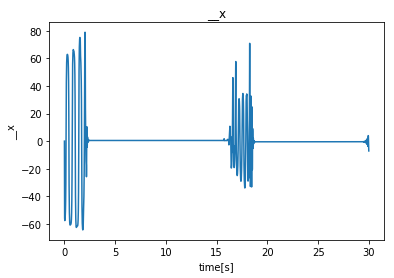

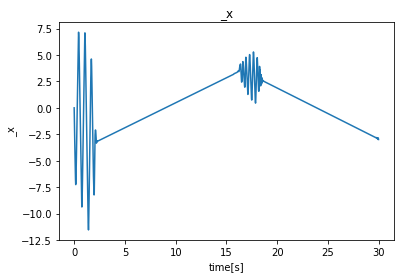

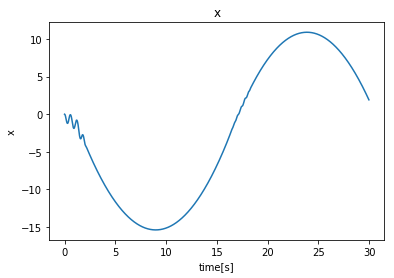

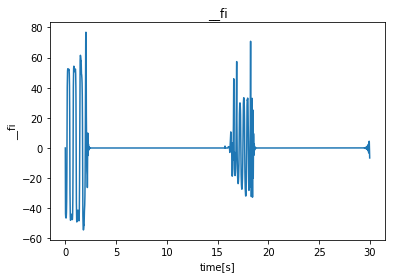

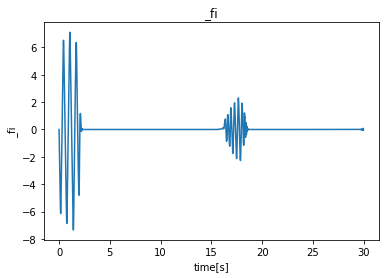

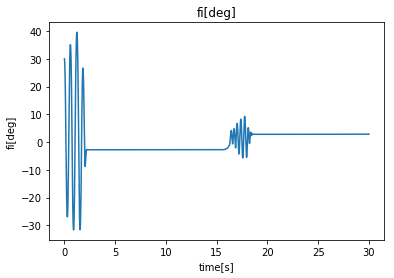

In [329]:
r = Record()
r.position_set(30)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]
print(angle, trolley)

for i in range(3000):
    estimated_force.input['fi'] = r.record['fi'][0]*180/np.pi
    estimated_force.input['x'] = r.record['x'][0]
    estimated_force.input['_fi'] = r.record['_fi'][0]
    estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force.compute()

    r.move([(estimated_force.output['force'], 0.01)], dt_min=0.01)
    print("angle: %0.2f  position: %0.2f  speed: %0.2f  force: %0.2f" % (r.record['fi'][0]*180/np.pi, 
                                                                         r.record['x'][0], 
                                                                         r.record['_fi'][0],
                                                                         estimated_force.output['force']))
    
r.visualize(['move'], r.stack_of_movement, separately=True)